# Events Files & Timing

### Import packages

In [1]:
import os
import re
import numpy as np
import pandas as pd
import subprocess
import seaborn as sb
import matplotlib.pyplot as plt 

### Check length of each run

#### Function for getting the number of frames in a video

In [2]:
# NOT USED - Do you still want to determine number of frames? For each run or trial? 
def get_frames(l):
    '''
    input:  list of movie filepaths
    output: list of # of frames
    '''

    frames = []

    for path in l:
        
        # Define the command
        command = ["ffprobe", "-v", "error", "-select_streams", "v:0", "-count_frames", "-show_entries", "stream=nb_read_frames", "-print_format", "csv", path]
        
        # Execute the command and capture output
        output = subprocess.run(command, capture_output=True).stdout.decode("utf-8")
        
        # Extract the number of frames using regex
        pattern = r"(\d+)"
        match = re.search(pattern, output)
        
        if match:
            number_of_frames = int(match.group(1))
        else:
            number_of_frames = np.nan
            print('could not find number of frames: '+path)

        frames.append(number_of_frames)
    
    return(frames)
            

#### Get the duration of each run

In [7]:
path = 'behavioral_data/MRI_Behavioral_Data/'

In [8]:
real_timing_dict = {1:{'subject':[],'duration':[], 'run':[]}, 
                    2:{'subject':[],'duration':[], 'run':[]}, 
                    3:{'subject':[],'duration':[], 'run':[]}, 
                    4:{'subject':[],'duration':[], 'run':[]}, 
                    5:{'subject':[],'duration':[], 'run':[]}, 
                    6:{'subject':[],'duration':[], 'run':[]}}

subject_dirs = [x for x in os.listdir(path) if 'ubject' in x and 'unusual' not in x
                and 'disregard' not in x]

print(subject_dirs)

# for each person
for s in subject_dirs:
    
    for logfile in os.listdir(path+s):
        
        # skip non-log files
        if not logfile.endswith('.log'):
            continue

        # load the log file and get run #
        log = pd.read_table(path +s+'/'+logfile,header=None)

        # provided that there were scan pulses recorded
        
        if log[2].eq('Keypress: equal').any():

            # get run #
            run_line = log[log[2].str.contains('.csv')].iloc[0, 2]
            run = int(re.search('movie_stim_(\d)\.csv', run_line).group(1))
            
            # find onset of first fixation and end of last fixation
            
            
            # exp_start = log[log[2]=='Keypress: equal'].iloc[0][0]
            exp_start = log[log[2]=='fix3: autoDraw = True'][0].unique()[0]
            
            # exp_end = list(log[log[2]=='Keypress: equal'][0])[-1]
            exp_end = log[log[2]=='fix4: autoDraw = False'][0].unique()[0]
    
            # run duration
            duration = exp_end - exp_start

        # else:
        #     duration = np.nan; run = np.nan
    
            # add the total time to dict, in the key for that run (1-6)
            real_timing_dict[run]['subject' ].append(s)
            real_timing_dict[run]['duration'].append(duration)
            real_timing_dict[run]['run'].append(run)
    

['subject_17', 'subject_4', 'subject_1', 'subject_9', 'subject_22', 'subject_6', 'subject_21', 'subject_19', 'subject_8', 'subject_14', 'subject_16', 'subject_12', 'subject_11', 'subject_7', 'subject_5', 'subject_2', 'subject_20', 'subject_10', 'subject_15', 'subject_13', 'subject_3', 'subject_18', 'subject_23']


In [9]:
def int_ending(string):
    return int(re.search(r'\d+$', string).group())


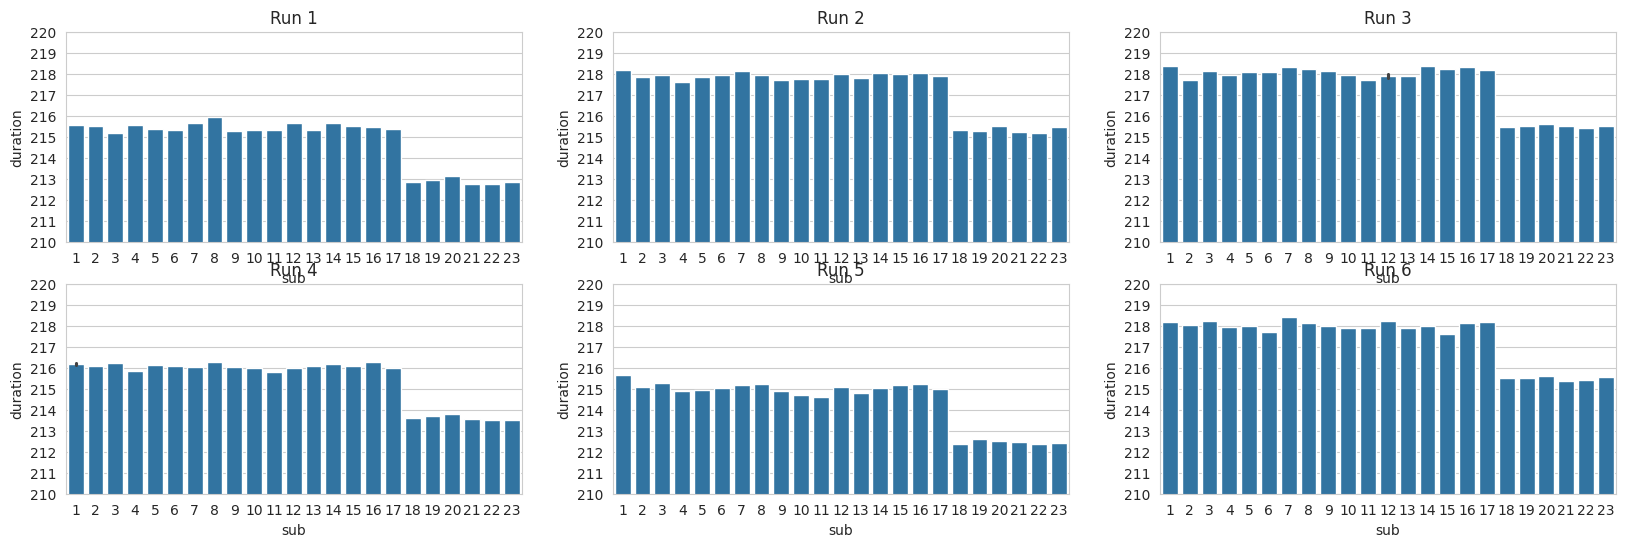

In [10]:
sb.set_style('whitegrid')

# prep data
big_df = pd.concat([pd.DataFrame(real_timing_dict[x]) for x in [1, 2, 3, 4, 5, 6]])

big_df['sub'] = [int_ending(x) for x in list(big_df['subject'])]

# make plot grid
fig, axes = plt.subplots(2, 3, gridspec_kw={'width_ratios': [4, 4, 4]},figsize=(20,6))

# for each run
for run, axis in zip(list(real_timing_dict.keys()), axes.flatten()):

    # plot a barplot where the x values are the individual subjects, y is the duration
    ax = sb.barplot(y='duration', x='sub', data=big_df[big_df['run']==run], ax=axis)
    ax.set_ylim((210, 220))
    ax.set_yticks(range(210,221))
    ax.set_title('Run '+str(run))
    #ax.set_xticks(rotation=90)
    # ax.set_ylim((214, 219))

In [11]:
# Variation in subjects 18-23
small = big_df[big_df['sub'] >= 18]

# Variation in subjects 1-17
big = big_df[big_df['sub'] <= 17]

# Ensure 'run' column is of type int
big_df['run'] = big_df['run'].astype(int)

for run in range(1, 7):
    print(f'Run {run}\n')

    print('small')
    small_durations = small[small['run'] == run]['duration']
    
    # Check if the selection is empty
    if small_durations.empty:
        print("No data available for small group in this run")
    else:
        print(f"mean time: {np.mean(small_durations):.3f}")
        print(f"min  time: {np.min(small_durations):.3f}")
        print(f"range:     {np.ptp(small_durations):.4f}")
    print()
    
    print('big')
    big_durations = big[big['run'] == run]['duration']
    
    # Check if the selection is empty
    if big_durations.empty:
        print("No data available for big group in this run")
    else:
        print(f"mean time: {np.mean(big_durations):.3f}")
        print(f"min  time: {np.min(big_durations):.3f}")
        print(f"range:     {np.ptp(big_durations):.4f}")
    print(); print('----------'); print()

Run 1

small
mean time: 212.877
min  time: 212.733
range:     0.3831

big
mean time: 215.471
min  time: 215.199
range:     0.7377

----------

Run 2

small
mean time: 215.330
min  time: 215.199
range:     0.3333

big
mean time: 217.899
min  time: 217.627
range:     0.5574

----------

Run 3

small
mean time: 215.497
min  time: 215.400
range:     0.2165

big
mean time: 218.075
min  time: 217.683
range:     0.6680

----------

Run 4

small
mean time: 213.605
min  time: 213.499
range:     0.2835

big
mean time: 216.078
min  time: 215.782
range:     0.5027

----------

Run 5

small
mean time: 212.447
min  time: 212.350
range:     0.2329

big
mean time: 215.043
min  time: 214.595
range:     1.0647

----------

Run 6

small
mean time: 215.489
min  time: 215.350
range:     0.2331

big
mean time: 218.020
min  time: 217.583
range:     0.8166

----------



In [45]:
# Calculate the average duration per run across all subjects
average_duration_per_run = big_df.groupby('run')['duration'].mean().reset_index()

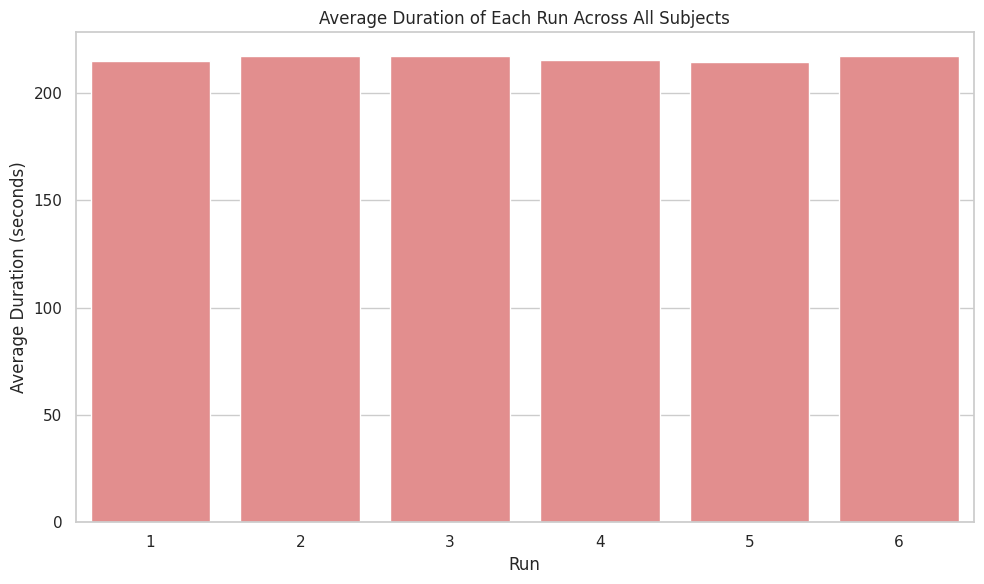

In [46]:
# Set plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_duration_per_run, x='run', y='duration', color='lightcoral')
plt.xlabel('Run')
plt.ylabel('Average Duration (seconds)')
plt.title('Average Duration of Each Run Across All Subjects')
plt.xticks(rotation=0)  # No rotation needed for x-axis
plt.tight_layout()
plt.show()

### Note: the above checks use:
+ first timepoint = ~first fixation cross frame flip
+ last timepoint  = ~last fixation cross frame flip 

### Where does the extra time come from? 

Let's explore the duration of...

+ the video stimuli themselves
+ the jittered time intervals between stimuli, 
+ the response periods, 
+ the fixation periods at the begining and end
+ etc...

and see 

+ how they compare to the intended timings
+ how they compare between "short-run" versus "long-run" participants
+ how the jittering is affected

### Prioritize: the things that matter for our experiment! 
+ stimulus onset times and durations
+ jittering / time between trials
+ response period

# Moviestim duration

In [21]:
# create df with all subjects' csv files 
# initialize an empty list to store dfs
all_dataframes = []

# iterate through each subject's directory
for subject_folder in os.listdir(path):
    subject_path = os.path.join(path, subject_folder)
    
    # check if the current path is a directory
    if os.path.isdir(subject_path):
        # iterate through each file in the subject's directory
        for file_name in os.listdir(subject_path):
            file_path = os.path.join(subject_path, file_name)
            
            # check if the file is a CSV and does not contain 'REPEAT'
            if file_name.endswith('.csv') and 'REPEAT' not in file_name:
                # read the CSV file and append it to the list of dfs
                sub_df = pd.read_csv(file_path)
                # add a column to indicate the subject
                sub_df['subject'] = subject_folder
                all_dataframes.append(sub_df)

# concatenate all dfs into a single df
all_data = pd.concat(all_dataframes, ignore_index=True)

# `big_dataframe` contains all the data from all the CSV files across all subjects
print(all_data.head())


   run  start_time       type  \
0  NaN         NaN        NaN   
1  4.0       10.00  scrambled   
2  4.0       19.59  scrambled   
3  4.0       28.07  scrambled   
4  4.0       36.17  veridical   

                                           moviestim  jitters  frames  \
0                                                NaN      NaN     NaN   
1  fps_60/1591975.bmp_pp86_L2_V1_scrambled_freevi...    10.00     NaN   
2  fps_60/1592804.bmp_pp60_L3_V1_scrambled_freevi...     3.59     NaN   
3  fps_60/1159318.bmp_pp93_L1_V1_scrambled_freevi...     2.48     NaN   
4  fps_60/1159482.bmp_pp97_L3_V1_veridical_freevi...     2.10     NaN   

   trials.thisRepN  trials.thisTrialN  trials.thisN  trials.thisIndex  ...  \
0              NaN                NaN           NaN               NaN  ...   
1              0.0                0.0           0.0               0.0  ...   
2              0.0                1.0           1.0               1.0  ...   
3              0.0                2.0           2.

In [22]:
# Calculate the movie duration 
all_data['movie_duration'] = all_data['text_15.started'] - all_data['movie.started']

# Find the average movie duration
average_duration = all_data['movie_duration'].mean()

print("Average Movie Duration in Seconds:")
print(average_duration) 

Average Movie Duration in Seconds:
3.1043090179482906


In [50]:
# Calculate the average duration of each stimulus
average_duration_per_stimulus = all_data.groupby('moviestim')['movie_duration'].mean().reset_index()

/tmp/ipykernel_850348/68683459.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_duration_per_stimulus, x='moviestim', y='movie_duration', palette='muted')
/tmp/ipykernel_850348/68683459.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


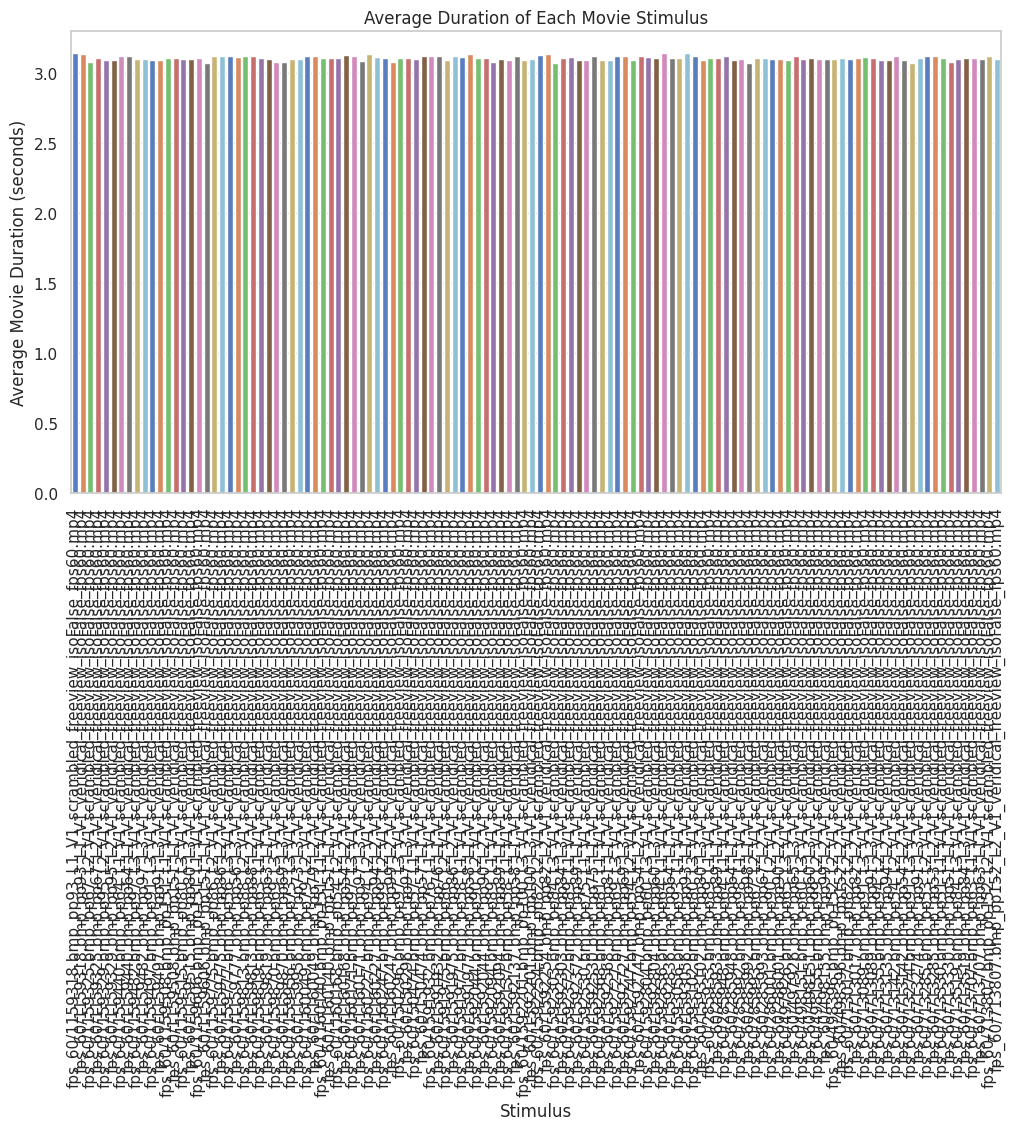

In [53]:
# Create a bar plot for average duration of each stimulus
plt.figure(figsize=(12, 6))
sns.barplot(data=average_duration_per_stimulus, x='moviestim', y='movie_duration', palette='muted')
plt.xlabel('Stimulus')
plt.ylabel('Average Movie Duration (seconds)')
plt.title('Average Duration of Each Movie Stimulus')
plt.xticks(rotation=90)  # Rotate x labels for better readability if needed
plt.tight_layout()
plt.show()

In [54]:
# Group by stimulus and subject, and calculate mean duration
subject_stimulus_duration = all_data.groupby(['subject', 'moviestim'])['movie_duration'].mean().reset_index()

# Calculate the standard deviation of movie durations for each stimulus across subjects
variability_per_stimulus = subject_stimulus_duration.groupby('moviestim')['movie_duration'].std().reset_index()

# Rename columns for clarity
variability_per_stimulus.columns = ['moviestim', 'std_deviation']

/tmp/ipykernel_850348/572192416.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=variability_per_stimulus, x='moviestim', y='std_deviation', palette='viridis')
/tmp/ipykernel_850348/572192416.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


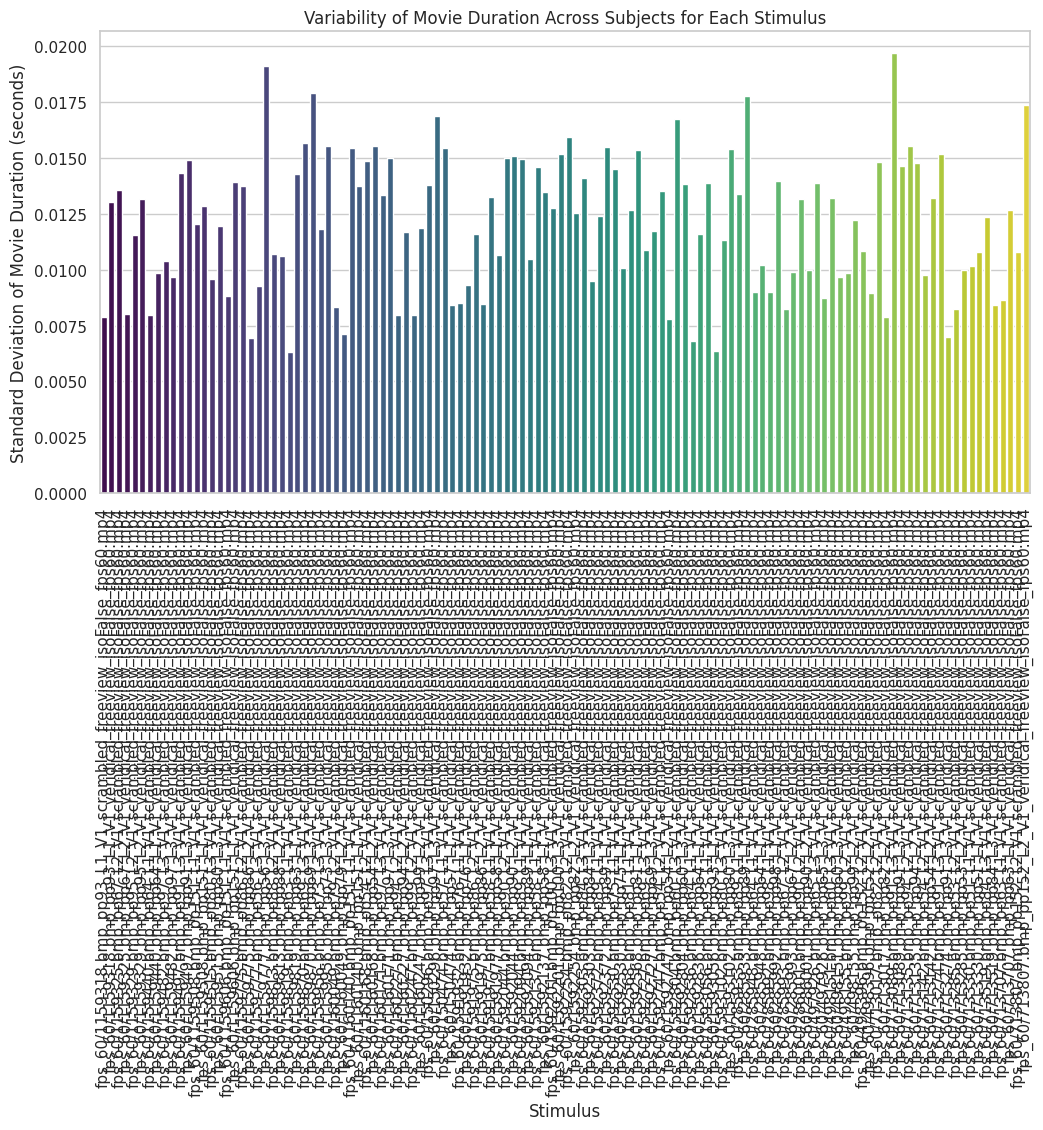

In [55]:
# Create a bar plot for standard deviation of movie durations across stimuli
plt.figure(figsize=(12, 6))
sns.barplot(data=variability_per_stimulus, x='moviestim', y='std_deviation', palette='viridis')
plt.xlabel('Stimulus')
plt.ylabel('Standard Deviation of Movie Duration (seconds)')
plt.title('Variability of Movie Duration Across Subjects for Each Stimulus')
plt.xticks(rotation=90)  # Rotate x labels for better readability if needed
plt.tight_layout()
plt.show()

/tmp/ipykernel_850348/1281093071.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subject_stimulus_duration, x='moviestim', y='movie_duration', palette='coolwarm')


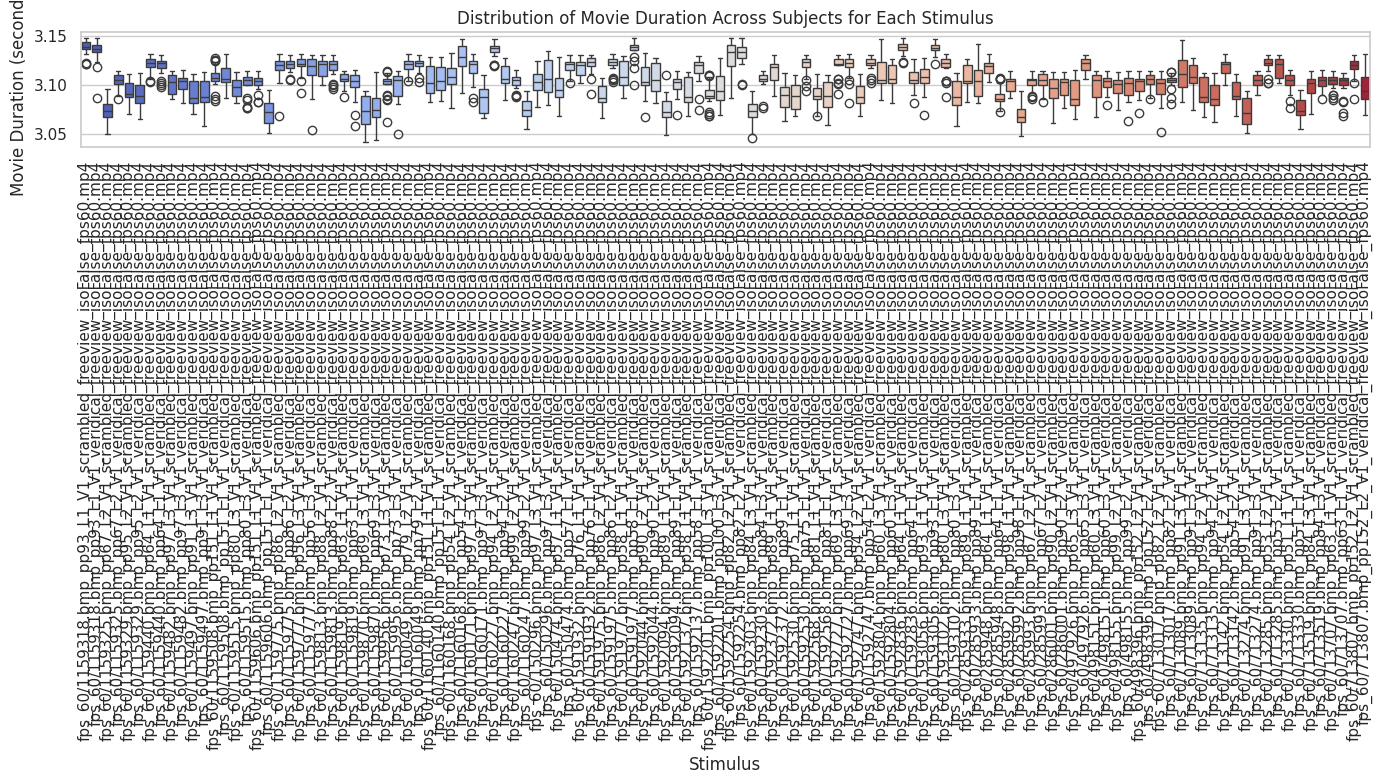

In [57]:
# Create a box plot to visualize duration distribution for each stimulus across subjects
plt.figure(figsize=(14, 8))
sns.boxplot(data=subject_stimulus_duration, x='moviestim', y='movie_duration', palette='coolwarm')
plt.xlabel('Stimulus')
plt.ylabel('Movie Duration (seconds)')
plt.title('Distribution of Movie Duration Across Subjects for Each Stimulus')
plt.xticks(rotation=90)  # Rotate x labels for better readability if needed
plt.tight_layout()
plt.show()

# Let's investigate the jitter timings

Note: currently looking at all runs and all subjects (no exclusions) just to get a sense of how the code ran / how the timings worked out

In [16]:
df_list      = []

jitter_dict  = {1:{'subject':[],'jitters':[], 'run':[]}, 
                2:{'subject':[],'jitters':[], 'run':[]}, 
                3:{'subject':[],'jitters':[], 'run':[]}, 
                4:{'subject':[],'jitters':[], 'run':[]}, 
                5:{'subject':[],'jitters':[], 'run':[]}, 
                6:{'subject':[],'jitters':[], 'run':[]}}

subject_dirs = [x for x in os.listdir(path) if 'ubject' in x and 'unusual' not in x
                and 'disregard' not in x]

# for each person
for s in subject_dirs:
    
    print(s)
    
    csv_files = [y for y in os.listdir(path+s) if y.endswith('.csv')]
    
    for logfile in os.listdir(path+s):
        if not logfile.endswith('.log'):
            continue
        
        # load the log file and get run #
        log = pd.read_table(path+s+'/'+logfile, header=None)

        # provided that there were scan pulses recorded
        
        if log[2].eq('Keypress: equal').any():

            run_line = log[log[2].str.contains('.csv')].iloc[0, 2]
            run = int(re.search('movie_stim_(\d)\.csv', run_line).group(1))
            
            # find start times and end times of each jitter
            
            # get the csv with the same run #############################################
            
            load_all_csvs = [ pd.read_csv(path+s+'/'+x) for x in csv_files ]
            csv_runs      = []
            all_csv_new   = []
                        
            for c in load_all_csvs:
                
                if c.shape[0]>1:
                    
                    all_csv_new.append(c)
                    
                    csv_runs.append(c['run'].dropna().unique()[0])
            
            # get the index in csv_runs for the number that is this run number
            index    = csv_runs.index(float(run))
            this_csv = all_csv_new[index]
            
            #############################################################################

            # exp_start = log[log[2]=='Keypress: equal'].iloc[0][0]
            jitter_start = log[log[2]=='fix3: autoDraw = True'][0].unique()
            
            # exp_end = list(log[log[2]=='Keypress: equal'][0])[-1]
            
            jitter_end   = log[log[2]=='fix3: autoDraw = False'][0].unique()
                
            # run duration
            jitter_dict   = {'starts':list(jitter_start), 'ends':list(jitter_end)} #exp_end - exp_start
            df            = pd.DataFrame(jitter_dict)
            df['subject'] = s
            df['run']     = run
            df['real_jitter']     = df['ends'] - df['starts']
            df['expected_jitter'] = list(this_csv['jitters'].dropna())
            df['jitter_diff']     = df['real_jitter'] - df['expected_jitter']
            df_list.append(df)
            
full_df = pd.concat(df_list)
            
#             # add the total time to dict, in the key for that run (1-6)
#             jitter_dict[int(run)]['subject' ].append(s)
#             jitter_dict[int(run)]['jitters'].append(jitter_start)
#             jitter_dict[int(run)]['run'].append(run)

subject_17
subject_4
subject_1
subject_9
subject_22
subject_6
subject_21
subject_19
subject_8
subject_14
subject_16
subject_12
subject_11
subject_7
subject_5
subject_2
subject_20
subject_10
subject_15
subject_13
subject_3
subject_18
subject_23


In [17]:
full_df.groupby(['subject'],as_index=False)[['expected_jitter','real_jitter','jitter_diff']].mean()

,subject,expected_jitter,real_jitter,jitter_diff
0,subject_1,3.828786,4.241582,0.412796
1,subject_10,3.833583,4.221639,0.388056
2,subject_11,3.833583,4.218067,0.384484
3,subject_12,3.842929,4.238150,0.395221
4,subject_13,3.833583,4.223548,0.389965
5,subject_14,3.833583,4.235377,0.401794
6,subject_15,3.833583,4.227293,0.393710
7,subject_16,3.833583,4.241862,0.408279
8,subject_17,3.833583,4.230807,0.397223
9,subject_18,3.833583,4.084071,0.250487


# max jitter

In [18]:
# QUESTION FOR KIRSTEN: why the <10 stipulation??

full_df[full_df['expected_jitter']<10][['expected_jitter','real_jitter','jitter_diff']].max()

expected_jitter     9.8400
real_jitter        10.3074
jitter_diff         0.5013
dtype: float64

# min jitter

In [19]:
# QUESTION FOR KIRSTEN: why the <10 stipulation??

full_df[full_df['expected_jitter']<10][['expected_jitter','real_jitter','jitter_diff']].min()

expected_jitter    2.0000
real_jitter        2.2433
jitter_diff        0.2085
dtype: float64

In [20]:
print(f"On average the jitter period was {full_df['jitter_diff'].mean():.2f} seconds longer than intended")

On average the jitter period was 0.36 seconds longer than intended


# How Jitter Compares betweeen "Short run" and "Long run" subjects 

In [34]:
# Calculate the average jitter_diff for each subject
average_jitter_by_subject = full_df.groupby('subject')['jitter_diff'].mean().reset_index()

# Rename the columns for clarity
average_jitter_by_subject.columns = ['subject', 'average_jitter_diff']

# Extract the numerical part from the subject identifier and convert to integer
average_jitter_by_subject['subject_number'] = average_jitter_by_subject['subject'].str.extract(r'(\d+)').astype(int)

# Sort the DataFrame by the subject number
average_jitter_by_subject = average_jitter_by_subject.sort_values(by='subject_number')

# Print the resulting DataFrame
print(average_jitter_by_subject)

       subject  average_jitter_diff  subject_number
0    subject_1             0.412796               1
11   subject_2             0.391830               2
16   subject_3             0.399881               3
17   subject_4             0.391792               4
18   subject_5             0.394996               5
19   subject_6             0.392924               6
20   subject_7             0.405974               7
21   subject_8             0.406308               8
22   subject_9             0.392140               9
1   subject_10             0.388056              10
2   subject_11             0.384484              11
3   subject_12             0.395221              12
4   subject_13             0.389965              13
5   subject_14             0.401794              14
6   subject_15             0.393710              15
7   subject_16             0.408279              16
8   subject_17             0.397223              17
9   subject_18             0.250487              18
10  subject_

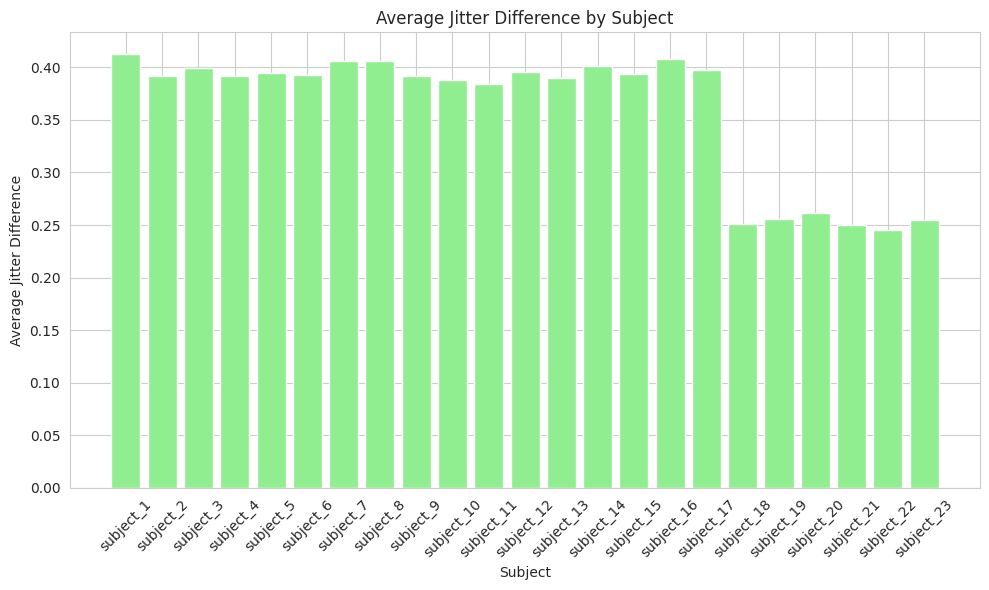

In [35]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(average_jitter_by_subject['subject'], average_jitter_by_subject['average_jitter_diff'], color='lightgreen')
plt.xlabel('Subject')
plt.ylabel('Average Jitter Difference')
plt.title('Average Jitter Difference by Subject')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for readability
plt.tight_layout()
plt.show()


# Average Response Period 

In [23]:
# calculate response periods
all_data['response_pd'] = all_data['key_resp_9.stopped'] - all_data['key_resp_9.started']

# Find the average response period
average_resp_pd = all_data['movie_duration'].mean()

print("Average Movie Duration in Seconds:")
print(average_resp_pd) 

Average Movie Duration in Seconds:
3.1043090179482906


In [28]:
# Calculate the average response period for each subject
av_response_pd_subject = all_data.groupby('subject')['response_pd'].mean().reset_index()

# Rename the columns for clarity
av_response_pd_subject.columns = ['subject', 'average_response_pd']

# Print the resulting DataFrame
print(av_response_pd_subject)

       subject  average_response_pd
0    subject_1             3.005070
1   subject_10             3.004553
2   subject_11             3.004631
3   subject_12             3.005474
4   subject_13             3.006205
5   subject_14             3.005311
6   subject_15             3.005242
7   subject_16             3.004544
8   subject_17             3.005040
9   subject_18             3.006314
10  subject_19             3.005765
11   subject_2             3.005426
12  subject_20             3.006032
13  subject_21             3.006141
14  subject_22             3.005910
15  subject_23             3.005518
16   subject_3             3.005116
17   subject_4             3.004633
18   subject_5             3.004764
19   subject_6             3.004804
20   subject_7             3.005390
21   subject_8             3.005149
22   subject_9             3.005623


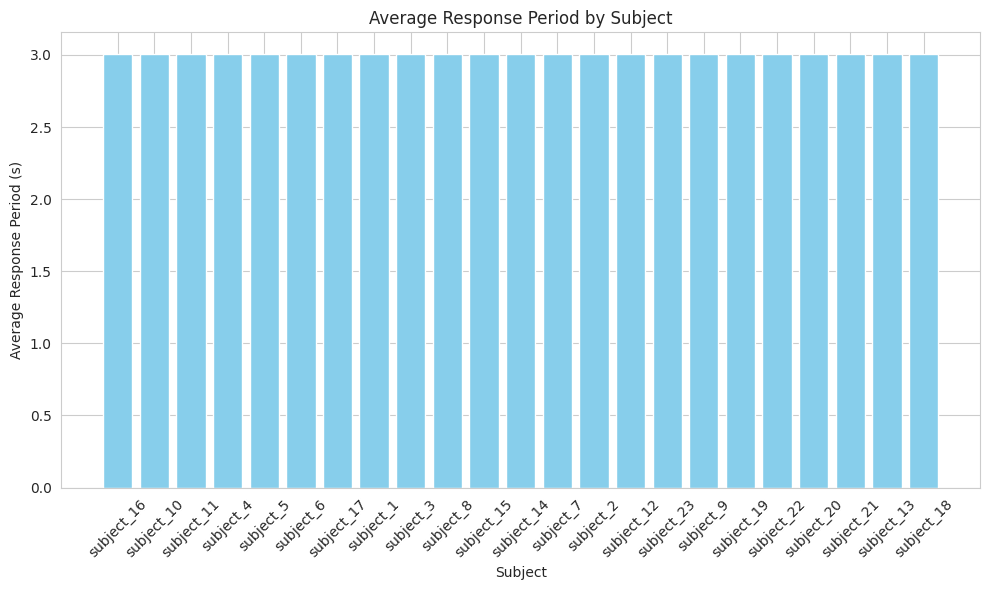

In [29]:
# Sort the DataFrame by average response time
av_response_pd_subject = av_response_pd_subject.sort_values(by='average_response_pd')

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(av_response_pd_subject['subject'], av_response_pd_subject['average_response_pd'], color='skyblue')
plt.xlabel('Subject')
plt.ylabel('Average Response Period (s)')
plt.title('Average Response Period by Subject')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()